In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

# 1. 데이터 로드 및 전처리 (학습, 검증, 테스트 데이터로 나누기) )

## 1) 데이터 로드

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


* 6개 숫자만 랜덤으로 뽑아보기

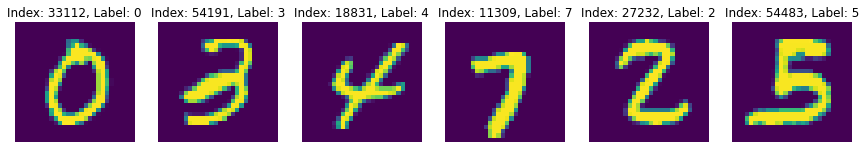

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [4]:
print(y_train[0])

4


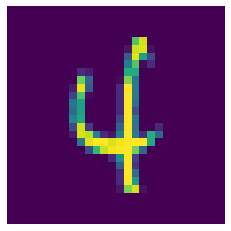

In [5]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

## 2) 전처리 (0~1 로 나타내기, 원핫인코딩)

In [7]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# 2. 모델 구성

In [8]:
#pip install pydot -qq

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


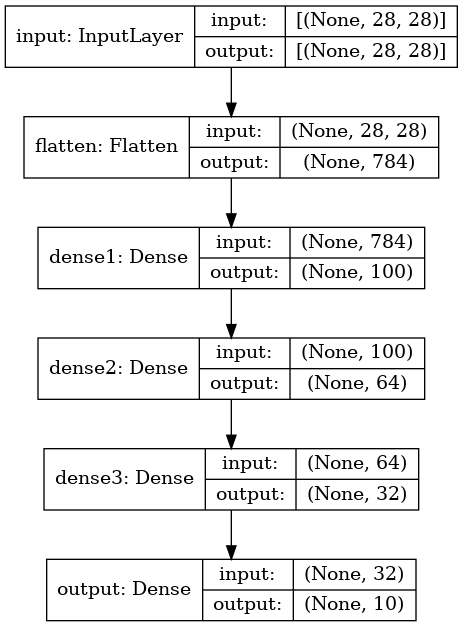

In [9]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()
utils.plot_model(model, show_shapes=True)

# 3. 모델 컴파일, 학습

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

* 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 categorical_crossentropy를 지정하고, 옵티마이저는 가장 기본적인 sgd을 지정합니다. 그리고 분류에 대한 성능을 확인하기 위한 지표로 accuracy를 지정

In [13]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 6s 7ms/step - loss: 1.8671 - accuracy: 0.4071 - val_loss: 1.2208 - val_accuracy: 0.6949
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.8473 - accuracy: 0.7831 - val_loss: 0.6575 - val_accuracy: 0.8148
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.5281 - accuracy: 0.8575 - val_loss: 0.4634 - val_accuracy: 0.8693
Epoch 4/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4170 - accuracy: 0.8840 - val_loss: 0.3967 - val_accuracy: 0.8836
Epoch 5/50
329/329 [==============================] - 1s 5ms/step - loss: 0.3657 - accuracy: 0.8965 - val_loss: 0.3730 - val_accuracy: 0.8931
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.9050 - val_loss: 0.3305 - val_accuracy: 0.9038
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3116 - accuracy: 0.9112 - val_loss: 0.3102 - val_accuracy: 0.9082
Epoch 

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

* 이렇게 학습과정을 history에 저장해서 각각 그래프로 그려볼 수 있다

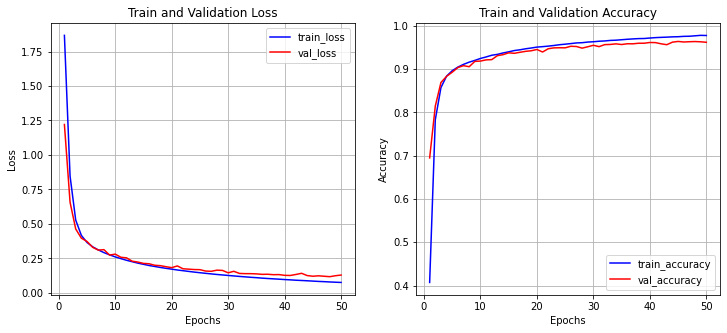

In [16]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 4. 모델 평가 및 예측

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1192 - accuracy: 0.9635


[0.11920173466205597, 0.9635000228881836]

In [19]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

(10000, 10)
[4.7373470e-07 5.3382910e-06 4.8407773e-04 9.6984702e-05 4.2258765e-08
 7.6328479e-06 5.5827598e-10 9.9936885e-01 1.8209752e-05 1.8515928e-05]


* 결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()를 통해서 구하고, 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력해봅니다.

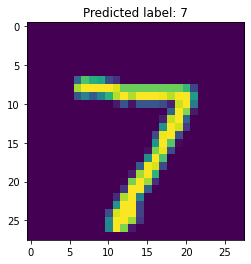

In [20]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.91      0.99      0.95      1032
           3       0.96      0.95      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.94      0.96       892
           6       0.96      0.98      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.98      0.94      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



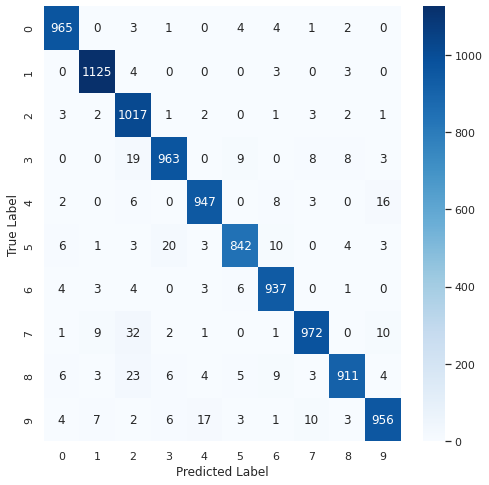

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5. 모델 저장

In [23]:
model.save('mnist_model.h5')

In [24]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [25]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

(10000, 10)
[4.7373470e-07 5.3382910e-06 4.8407773e-04 9.6984702e-05 4.2258765e-08
 7.6328479e-06 5.5827598e-10 9.9936885e-01 1.8209752e-05 1.8515928e-05]


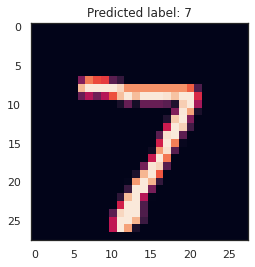

In [26]:
#예측값 시각화하기
arg_pred_y2 =np.argmax(pred_ys2, axis=1)


#matlotlib를 이용해서 시각화하기
plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [27]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

(10000, 10)
[0.10218863 0.1315181  0.10943004 0.10973513 0.10248236 0.09316371
 0.09340706 0.06034731 0.09160157 0.1061261 ]


# 6. 콜백함수
-  콜백의 대표적인 예로는 ModelCheckpoint, EarlyStopping, LearningRateScheduler, Tensorboard가 있습니다

In [28]:
from tensorflow.keras import callbacks

## 1) Model Checkpoint
- tf.keras.callbacks.ModelCheckpoint: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용합니다.

In [29]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0828 - accuracy: 0.9755
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0763 - accuracy: 0.9775
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.9796
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0647 - accuracy: 0.9808
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0603 - accuracy: 0.9824
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0550 - accuracy: 0.9837
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9849
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0471 - accuracy: 0.9866
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0440 - accuracy: 0.9875
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.040

In [30]:
#최상의 모델만을 저장하는 옵션으로 save_best_only=True를 지정합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.1087 - val_accuracy: 0.9686
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 0.1193 - val_accuracy: 0.9656
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0325 - accuracy: 0.9909 - val_loss: 0.1075 - val_accuracy: 0.9688
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0296 - accuracy: 0.9918 - val_loss: 0.1233 - val_accuracy: 0.9646
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.1036 - val_accuracy: 0.9712
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 0.1041 - val_accuracy: 0.9712
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.1081 - val_accuracy:

## 2) Earlystopping
- tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용합니다.

In [31]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0168 - accuracy: 0.9964 - val_loss: 0.1140 - val_accuracy: 0.9697
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0153 - accuracy: 0.9974 - val_loss: 0.1091 - val_accuracy: 0.9722
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0145 - accuracy: 0.9973 - val_loss: 0.1087 - val_accuracy: 0.9714
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0131 - accuracy: 0.9975 - val_loss: 0.1090 - val_accuracy: 0.9728
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0119 - accuracy: 0.9982 - val_loss: 0.1093 - val_accuracy: 0.9729
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0110 - accuracy: 0.9985 - val_loss: 0.1103 - val_accuracy: 0.9728


## 3) LearningRateScheduler
- tf.keras.callbacks.LearningRateSchduler: 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용합니다

In [33]:
# 에폭 수가 10 미만일 경우는 학습률을 그대로 하고, 10 이상이 되면 -0.1%씩 감소시키는 코드
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [34]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [35]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

## 4) Tensorboard
- tf.keras.callbacks.TensorBoard: 모델의 경과를 모니터링할 때 사용합니다.
- 로컬PC나 colab 등의 환경에서 위의 코드를 그대로 구동한다면 tensorboard 결과를 확인하실 수 있습니다.

In [36]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0042 - accuracy: 0.9999 - val_loss: 0.1187 - val_accuracy: 0.9737
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.1198 - val_accuracy: 0.9729
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.1198 - val_accuracy: 0.9733
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.1206 - val_accuracy: 0.9733
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.1212 - val_accuracy: 0.9736
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.1217 - val_accuracy: 0.9729
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.1216 - val_accuracy:

In [41]:
# %load_ext tensorboard
# %tensorboard --logdir {log_dir}

---

# (예) IMBD 딥러닝 모델

## 1) 데이터 로드 및 전처리

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

17473536/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [2]:
word_index = imdb.get_word_index()
# word_index

1654784/1641221 [==============================] - 0s 0us/step


In [3]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [4]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

In [5]:
word_25th = index_word[25]
print(word_25th)

have


In [6]:
#train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [7]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# 10000 차원을 가지는 원핫힌코딩 처리 
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
# IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환을 시켜줍니다.
print(train_labels[0])
print(test_labels[0])

1
0


In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


## 2) 모델 구성

In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

* 첫번째 레이어 : Dense로 유닛 16개를 가지고, 10000차원의 데이터를 받을 수 있다
* 두번째 레이어 : Dense로 유닛 16개
* 세번째 레이어 : 긍/부 결과만 받도록 유닛 1개만 받는다

## 3) 모델 컴파일, 학습

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 102ms/step - loss: 0.4419 - accuracy: 0.8256 - val_loss: 0.3314 - val_accuracy: 0.8791
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2556 - accuracy: 0.9106 - val_loss: 0.2849 - val_accuracy: 0.8873
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1977 - accuracy: 0.9299 - val_loss: 0.3147 - val_accuracy: 0.8728
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1642 - accuracy: 0.9424 - val_loss: 0.3147 - val_accuracy: 0.8774
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1428 - accuracy: 0.9493 - val_loss: 0.3149 - val_accuracy: 0.8787
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1233 - accuracy: 0.9570 - val_loss: 0.3399 - val_accuracy: 0.8756
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1104 - accuracy: 0.9621 - val_loss: 0.3648 - val_accuracy: 0.8717
Epoch 8/20
4

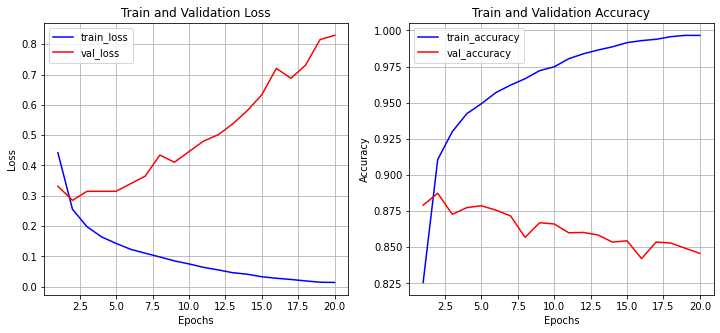

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* history에서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.